In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Import statics model using for running model 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as scs
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 **Import Data**

In [4]:
df = pd.read_excel('/content/drive/MyDrive/GPA UNI/NĂM 3 HKI/DỰ BÁO KINH TẾ/data-db-1.xlsx')
df

,Date,VNIndex,DJIA,Interest rate,Exchange rate
0,2022-11-30,1032.16,33795.43,7.16,23.693
1,2022-11-29,1005.69,33847.80,5.46,23.698
2,2022-11-28,971.46,34185.42,4.64,23.703
3,2022-11-25,947.71,34213.04,4.04,23.700
4,2022-11-24,946.00,34091.57,3.03,23.688
...,...,...,...,...,...
1016,2018-11-07,922.03,25061.48,3.05,23.060
1017,2018-11-06,931.00,25388.08,3.20,23.052
1018,2018-11-05,920.87,25321.21,3.10,23.052
1019,2018-11-02,911.35,25959.33,3.15,23.060


In [5]:
df.set_index('Date',inplace=True)
df

,VNIndex,DJIA,Interest rate,Exchange rate
Date,,,,
2022-11-30,1032.16,33795.43,7.16,23.693
2022-11-29,1005.69,33847.80,5.46,23.698
2022-11-28,971.46,34185.42,4.64,23.703
2022-11-25,947.71,34213.04,4.04,23.700
2022-11-24,946.00,34091.57,3.03,23.688
...,...,...,...,...
2018-11-07,922.03,25061.48,3.05,23.060
2018-11-06,931.00,25388.08,3.20,23.052
2018-11-05,920.87,25321.21,3.10,23.052


In [6]:
df_new=df.reindex(index=df.index[::-1])
df_new

,VNIndex,DJIA,Interest rate,Exchange rate
Date,,,,
2018-11-01,915.52,26149.11,3.12,23.065
2018-11-02,911.35,25959.33,3.15,23.060
2018-11-05,920.87,25321.21,3.10,23.052
2018-11-06,931.00,25388.08,3.20,23.052
2018-11-07,922.03,25061.48,3.05,23.060
...,...,...,...,...
2022-11-24,946.00,34091.57,3.03,23.688
2022-11-25,947.71,34213.04,4.04,23.700
2022-11-28,971.46,34185.42,4.64,23.703


In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1021 entries, 2018-11-01 to 2022-11-30
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VNIndex        1021 non-null   float64
 1   DJIA           1021 non-null   float64
 2   Interest rate  1021 non-null   float64
 3   Exchange rate  1021 non-null   float64
dtypes: float64(4)
memory usage: 39.9 KB


In [8]:
df_new.isnull().sum()

VNIndex          0
DJIA             0
Interest rate    0
Exchange rate    0
dtype: int64

In [9]:
df_new.describe()

,VNIndex,DJIA,Interest rate,Exchange rate
count,1021.000000,1021.000000,1021.000000,1021.000000
mean,1099.920793,29785.882801,1.983438,23.179553
std,214.569119,3971.177594,1.630174,0.175714
min,658.800000,19028.360000,0.100000,23.050000
25%,945.620000,26409.330000,0.620000,23.134000
50%,998.330000,29406.750000,1.740000,23.162000
75%,1275.280000,33795.430000,3.150000,23.209000
max,1534.100000,36722.600000,8.440000,28.181000


<Axes: xlabel='Date'>

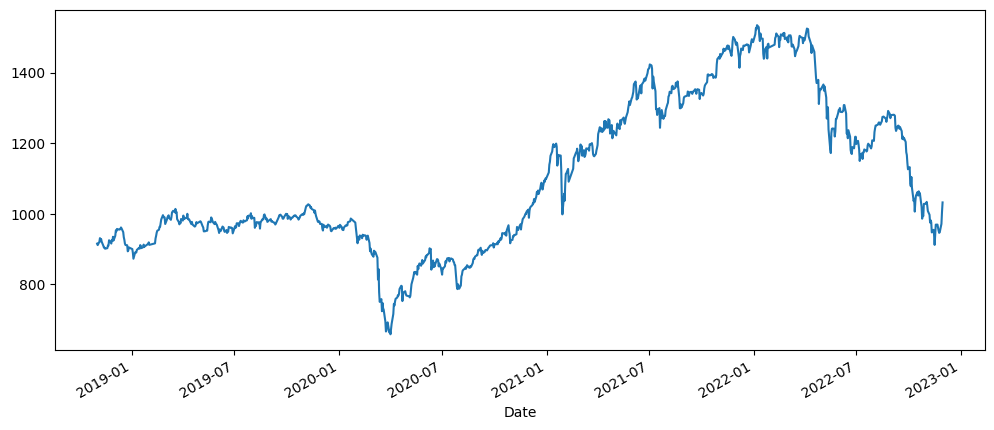

In [10]:
plt.figure(figsize = (12, 5))
df_new['VNIndex'].plot()

**check the stationary of VNIndex series using the Augmented Dickey Fuller test (ADF Test)**

In [11]:
# Function ADF test
def adf_test(x):

    stats_index = ['ADF Statistic', 'p-value', '# of Lags Used', '# of Observations Used']

    test_adf = adfuller(x, autolag='AIC')
    results = pd.Series(test_adf[0:4], index = stats_index)

    for key, value in test_adf[4].items():
        results[f'Critical Value ({key})'] = value

    return results

# Test ADF with VNIndex.
print('ADF test result of VNIndex:')
adf_test(df_new['VNIndex'])

ADF test result of VNIndex:


ADF Statistic               -1.241407
p-value                      0.655535
# of Lags Used               0.000000
# of Observations Used    1020.000000
Critical Value (1%)         -3.436777
Critical Value (5%)         -2.864378
Critical Value (10%)        -2.568281
dtype: float64

Since p-value(0.65) is greater than the significance level(0.05), The series is Non-Stationary. 
Let’s difference the series and see how the autocorrelation plot looks like.

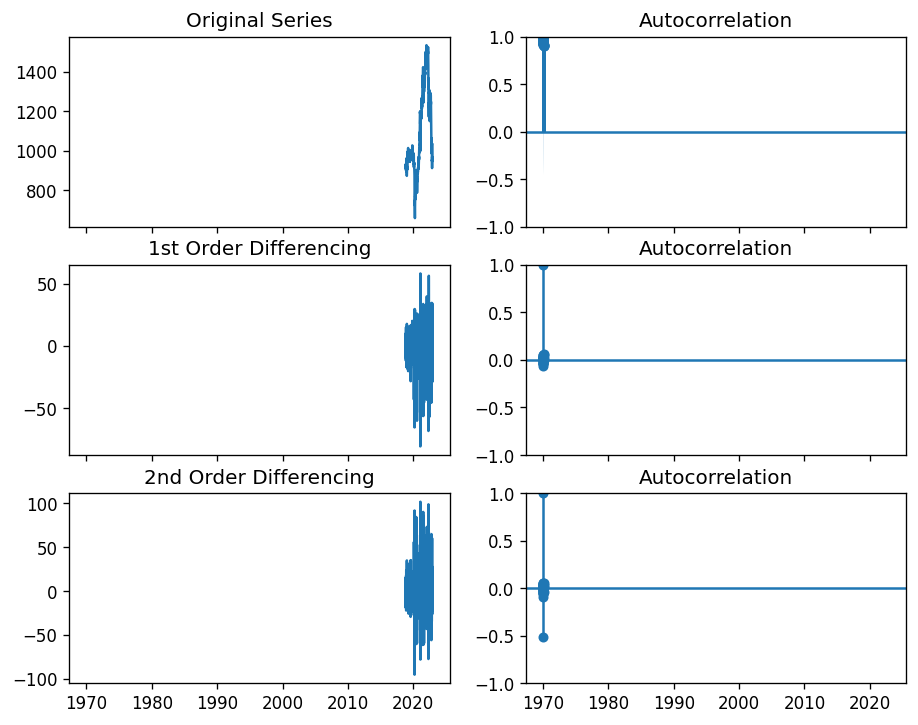

In [12]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df_new.VNIndex); axes[0, 0].set_title('Original Series')
plot_acf(df_new.VNIndex, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_new.VNIndex.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_new.VNIndex.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_new.VNIndex.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_new.VNIndex.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [13]:
result = adfuller(df_new.VNIndex.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -31.665358
p-value: 0.000000


Since p-value(0.00) is less than the significance level(0.05), The series is Stationary.

**To facilitate the construction of an ARIMA model, we will convert the VNIndex series into a stationary series by taking the first-order difference of the logarithmic returns**

In [14]:
df_new['RVNIndex'] = np.log(df_new['VNIndex']/(df_new['VNIndex'].shift(1)))*100
  
# Show the dataframe
df_new 

,VNIndex,DJIA,Interest rate,Exchange rate,RVNIndex
Date,,,,,
2018-11-01,915.52,26149.11,3.12,23.065,NaN
2018-11-02,911.35,25959.33,3.15,23.060,-0.456519
2018-11-05,920.87,25321.21,3.10,23.052,1.039186
2018-11-06,931.00,25388.08,3.20,23.052,1.094040
2018-11-07,922.03,25061.48,3.05,23.060,-0.968152
...,...,...,...,...,...
2022-11-24,946.00,34091.57,3.03,23.688,-0.644851
2022-11-25,947.71,34213.04,4.04,23.700,0.180598
2022-11-28,971.46,34185.42,4.64,23.703,2.475155


In [15]:
df_new.drop(df_new.index[0], axis=0, inplace = True)
df_new

,VNIndex,DJIA,Interest rate,Exchange rate,RVNIndex
Date,,,,,
2018-11-02,911.35,25959.33,3.15,23.060,-0.456519
2018-11-05,920.87,25321.21,3.10,23.052,1.039186
2018-11-06,931.00,25388.08,3.20,23.052,1.094040
2018-11-07,922.03,25061.48,3.05,23.060,-0.968152
2018-11-08,928.69,25242.35,3.15,23.058,0.719723
...,...,...,...,...,...
2022-11-24,946.00,34091.57,3.03,23.688,-0.644851
2022-11-25,947.71,34213.04,4.04,23.700,0.180598
2022-11-28,971.46,34185.42,4.64,23.703,2.475155


In [16]:
# Function ADF test
def adf_test(a):

    stats_index = ['ADF Statistic', 'p-value', '# of Lags Used', '# of Observations Used']

    test_adf = adfuller(a, autolag='AIC')
    results = pd.Series(test_adf[0:4], index = stats_index)

    for key, value in test_adf[4].items():
        results[f'Critical Value ({key})'] = value

    return results

# Test ADF with RVNIndex.
print('ADF test result of RVNIndex:')
adf_test(df_new['RVNIndex'])

ADF test result of RVNIndex:


ADF Statistic              -21.388389
p-value                      0.000000
# of Lags Used               1.000000
# of Observations Used    1018.000000
Critical Value (1%)         -3.436790
Critical Value (5%)         -2.864383
Critical Value (10%)        -2.568284
dtype: float64

Since the absolute value of the computed values exceeds the absolute value of the critical value, the null hypothesis H0 is rejected, indicating that the RVNIndex data series is stationary.

<Axes: xlabel='Date'>

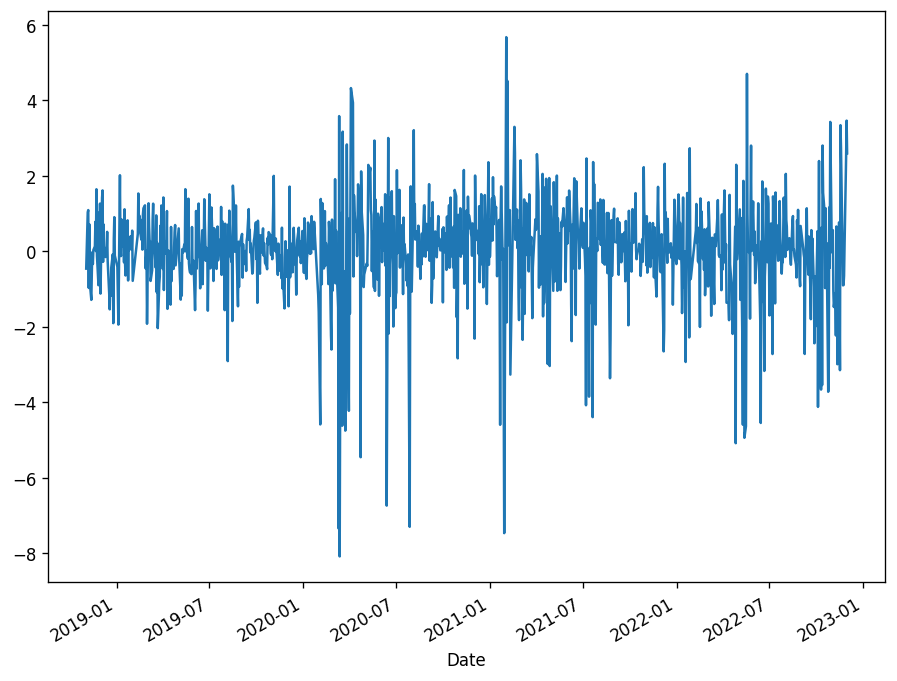

In [17]:
df_new['RVNIndex'].plot()

***Autocorrelation, Partial Autocorrelation test***

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


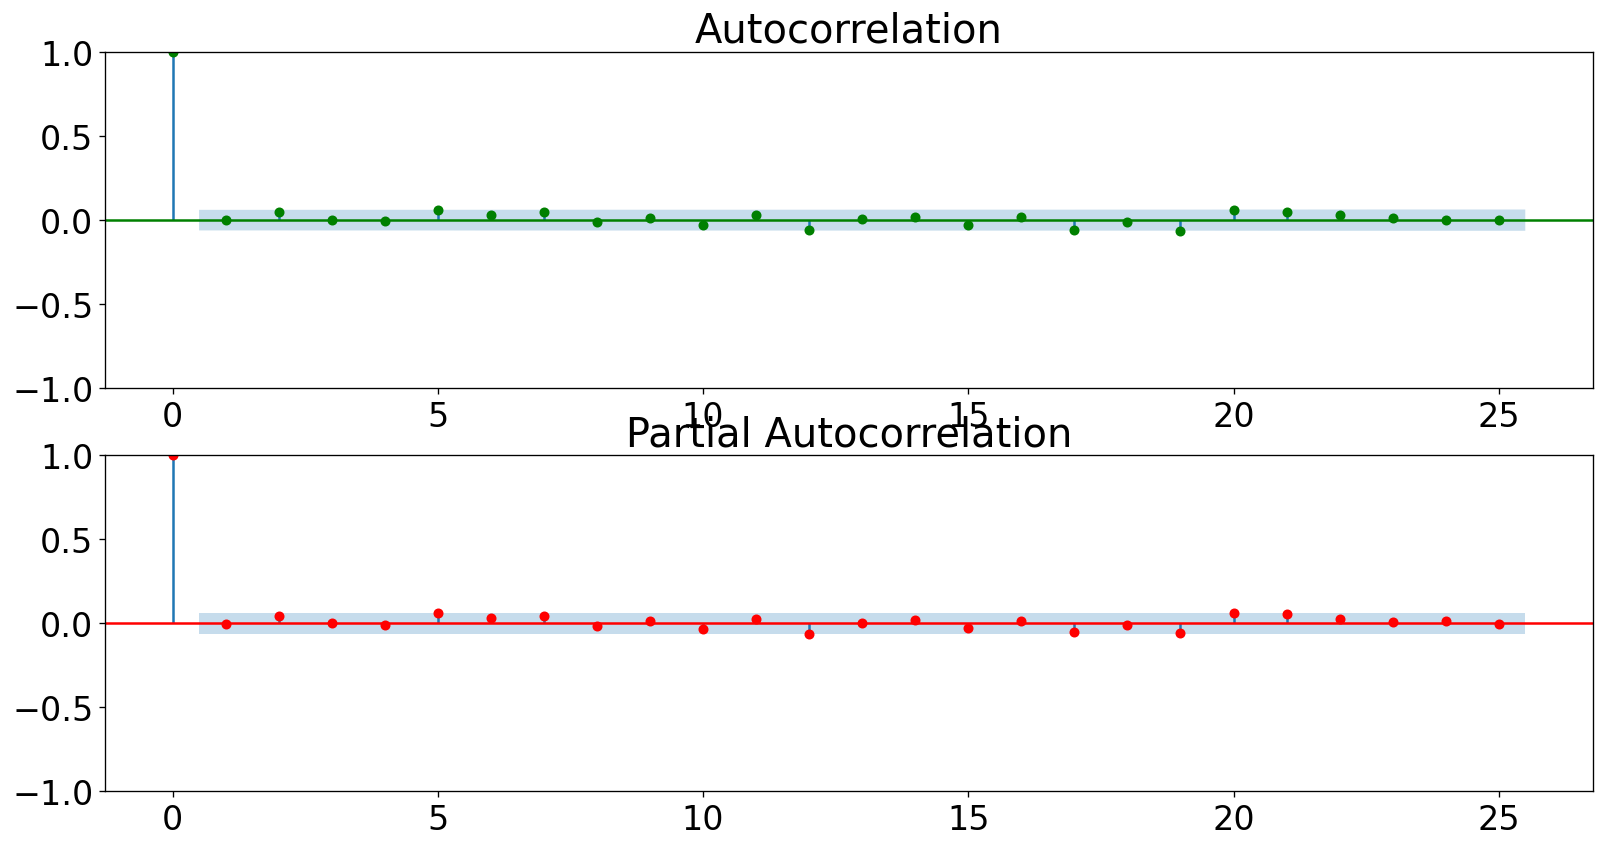

In [18]:
# Specify parameters
n_lags = 25
significance_level = 0.05

# Update size and font for image
%matplotlib inline
plt.rcParams['figure.figsize'] = [22, 18]
plt.rcParams.update({'font.size': 20}) 

# Draw plot
fig, ax = plt.subplots(2, figsize=(16, 8))

# Plot ACF
plot_acf(df_new['RVNIndex'], ax = ax[0], lags = n_lags, 
         alpha = significance_level, c= 'green')

# Plot PACF
plot_pacf(df_new['RVNIndex'], ax = ax[1], lags = n_lags, 
          alpha = significance_level,c= 'red')

plt.show()

***ARMIA model results***

In [19]:
arima = sm.tsa.arima.ARIMA(df_new['RVNIndex'], order = (2, 0, 2)).fit()
print(arima.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               RVNIndex   No. Observations:                 1020
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1770.155
Date:                Sun, 11 Jun 2023   AIC                           3552.310
Time:                        13:29:11   BIC                           3581.876
Sample:                             0   HQIC                          3563.536
                               - 1020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0119      0.050      0.239      0.811      -0.086       0.110
ar.L1         -0.0827      0.221     -0.374      0.708      -0.515       0.350
ar.L2         -0.6255      0.245     -2.548      0.0

**White residual test**

In [20]:
def arima_diagnostics(resids, n_lags=25):
    
    # Create subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

    # Calculate resids
    r = resids
    resids = (r - np.nanmean(r)) / np.nanstd(r)
    resids_nonmissing = resids[~(np.isnan(resids))]
    
    # residuals over time
    sns.lineplot(x=np.arange(len(resids)), y=resids, ax=ax1)
    ax1.set_title('Standardized residuals')

    # Distribution of residuals
    x_lim = (-1.96 * 2, 1.96 * 2)
    r_range = np.linspace(x_lim[0], x_lim[1])
    norm_pdf = scs.norm.pdf(r_range)
    
    # Plot distribution
    sns.distplot(resids_nonmissing, hist=True, kde=True, 
                 norm_hist=True, ax=ax2)
    ax2.plot(r_range, norm_pdf, 'g', lw=2, label='N(0,1)')
    ax2.set_title('Distribution of standardized residuals')
    ax2.set_xlim(x_lim)
    ax2.legend()
        
    # Q-Q plot
    qq = sm.qqplot(resids_nonmissing, line='s', ax=ax3)
    ax3.set_title('Q-Q plot')

    # ACF plot
    plot_acf(resids, ax=ax4, lags=n_lags, alpha=0.05)
    ax4.set_title('ACF plot')

    return fig

<ipython-input-20-fd6aa89657ab>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resids_nonmissing, hist=True, kde=True,


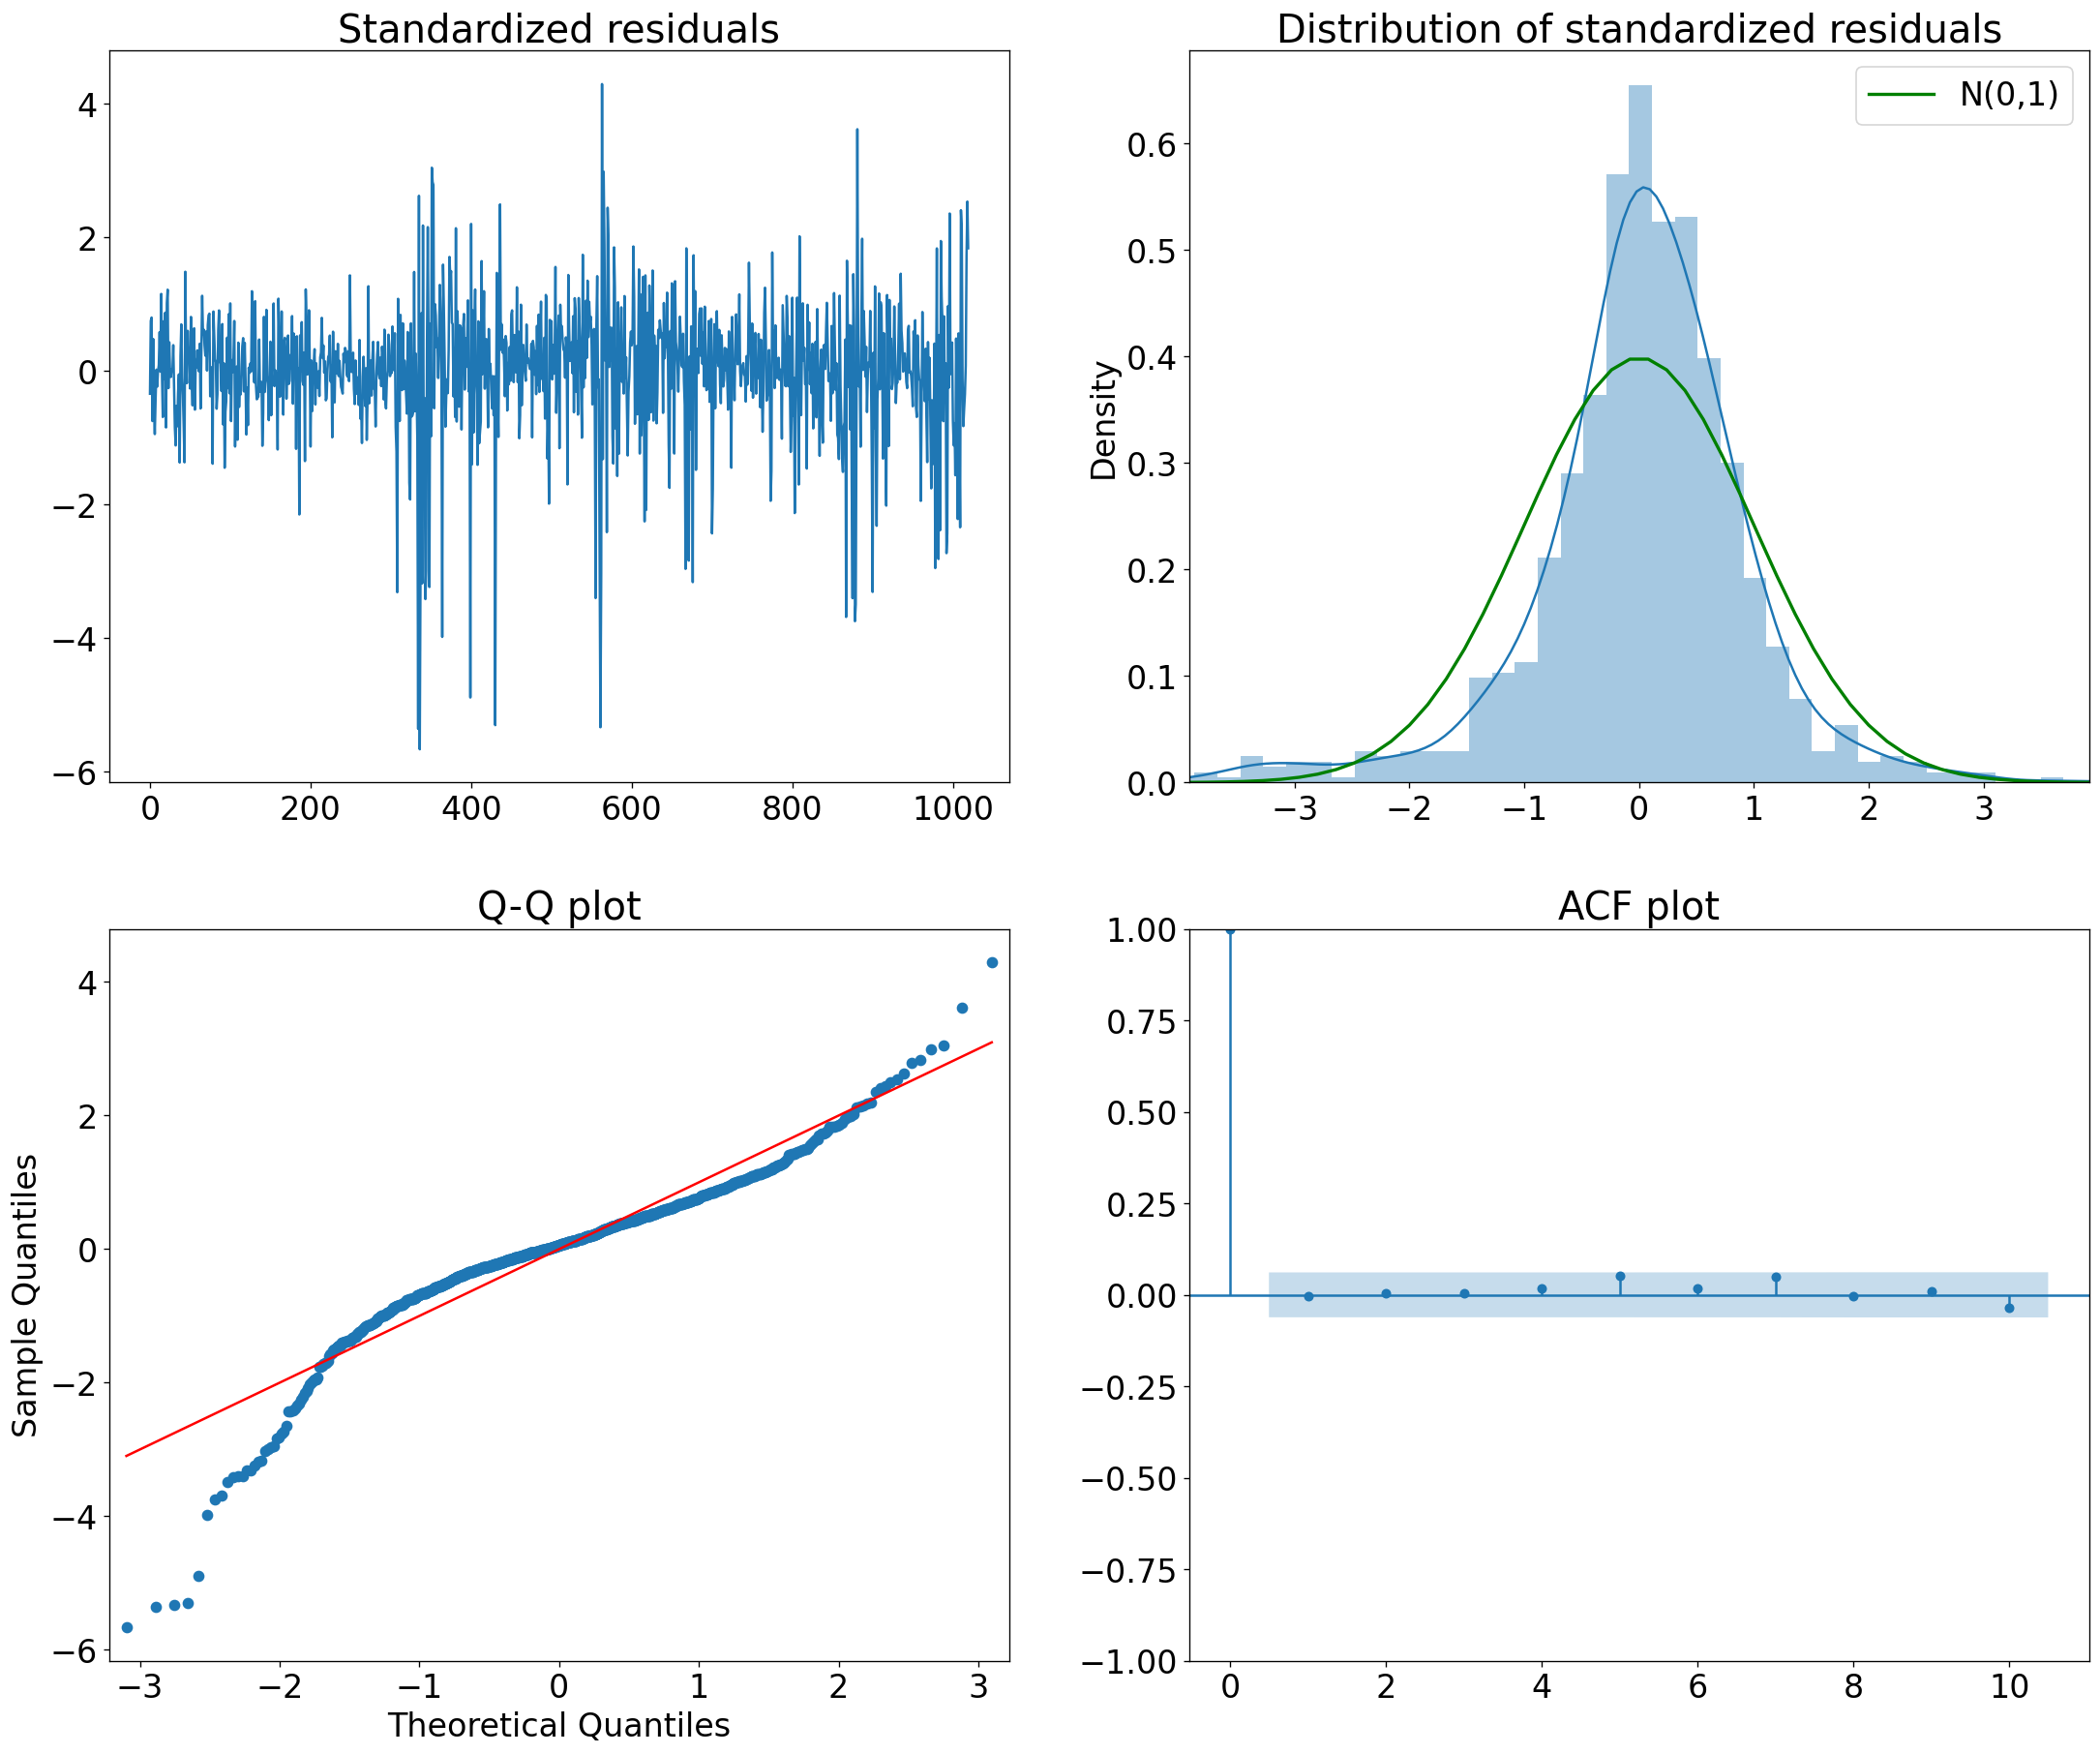

In [21]:
# Run residual testing function
arima_diagnostics(arima.resid, 10)
plt.show();